In [73]:
import numpy as np
import keras
import tensorflow
from numpy.linalg.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.markers import MarkerStyle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

data6 = np.load('/home/maeda/machine_learning/results/kikuchi-7vals_v1/saliency-map/lt-0day/grads_0day_Jun.npz')
data7 = np.load('/home/maeda/machine_learning/results/kikuchi-7vals_v1/saliency-map/lt-0day/grads_0day_Jul.npz')
data8 = np.load('/home/maeda/machine_learning/results/kikuchi-7vals_v1/saliency-map/lt-0day/grads_0day_Aug.npz')

print(data6.files)

['grads']


In [74]:
grads6 = data6['grads']
grads7 = data7['grads']
grads8 = data8['grads']
print(grads6.shape, grads7.shape, grads8.shape)
lead_time = 0

(210, 25, 144, 15) (217, 25, 144, 15) (217, 25, 144, 15)


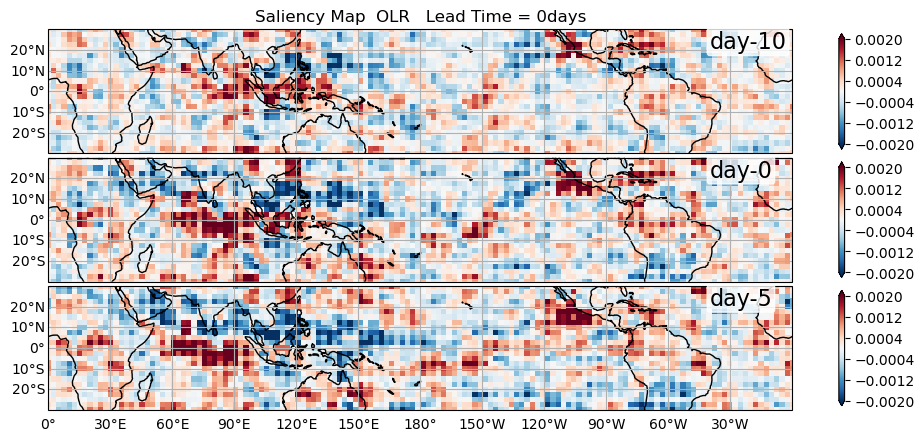

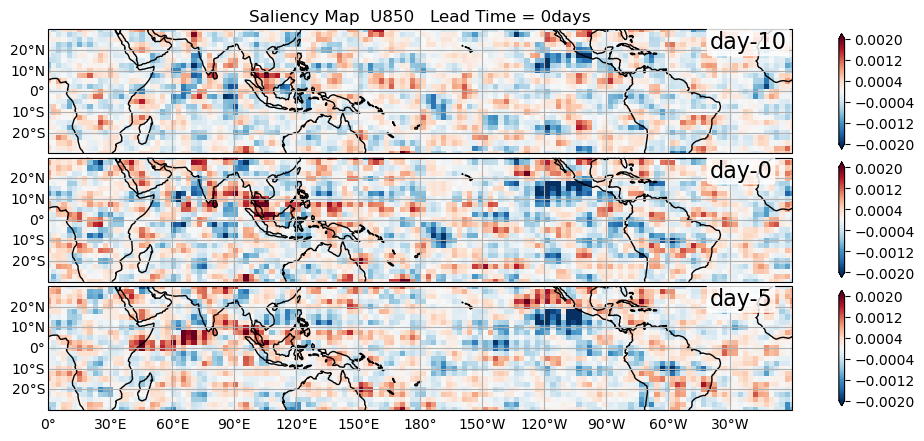

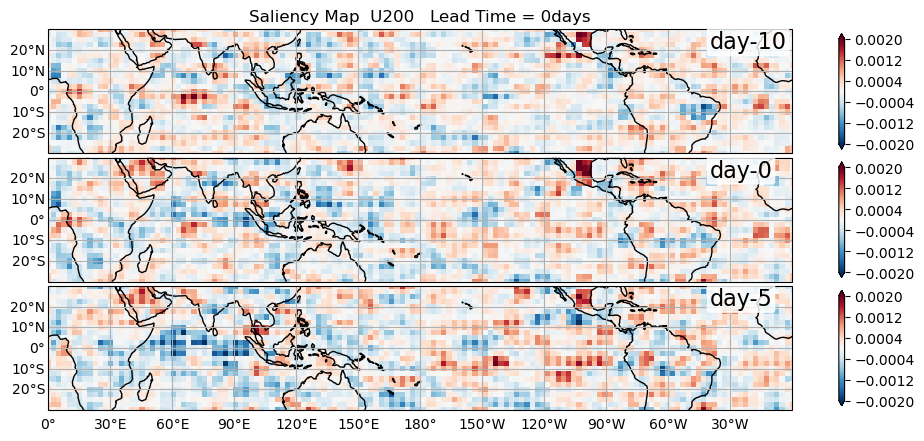

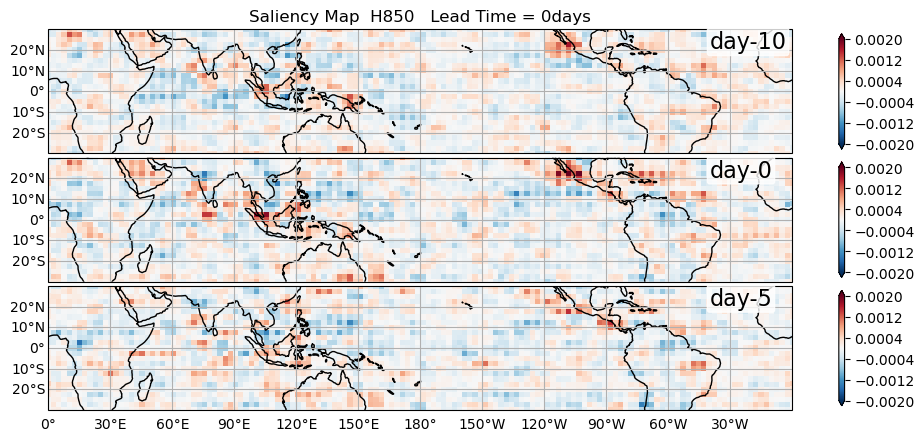

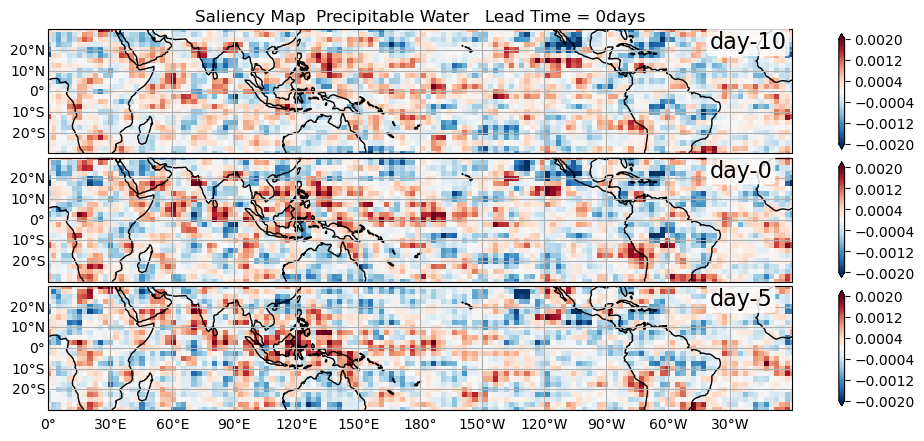

In [59]:
name_box = ['OLR', 'U850', 'U200', 'H850', 'Precipitable Water']
lag_box = ['day-0', 'day-5', 'day-10']
for jj in range(5):
    fig = plt.figure(figsize=(12,5))
    for cc in range(3):
        ax=fig.add_subplot(3,1,cc+1, projection=ccrs.PlateCarree(central_longitude=180))
        # 上下の余白を調整
        plt.subplots_adjust(hspace=0)
        ax.set_extent([-180, 180, -30, 30], crs=ccrs.PlateCarree())
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.top_labels = False     # 上部の経度のラベルを消去
        if cc != 2:
            gl.bottom_labels = False
        gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30)) # 経度線
        gl.ylocator = mticker.FixedLocator(np.arange(-30, 30, 10)) # 緯度線
        ax.coastlines()

        lon = np.linspace(0, 360, 144)
        lat = np.linspace(30, -30, 25)
        x, y = np.meshgrid(lon-180.0, lat) # 経度、緯度データ
        cntr = ax.pcolormesh(x, y, grads[0,:,:,3*jj+cc], vmax=0.002, vmin=-0.002, cmap='RdBu_r')
        cbar = fig.colorbar(cntr,ticks = np.linspace(-0.002, 0.002, 6), extend='both', orientation='vertical', shrink=0.9)
        ax.text(140, 24, lag_box[cc-1], fontsize=16, ha='left', va='center', bbox=dict(facecolor='w', edgecolor='w', boxstyle='round,pad=0.1', alpha=0.8))
        if cc == 0:
            ax.set_title('Saliency Map  ' + str(name_box[jj]) + '   Lead Time = ' + str(lead_time) + 'days')
        ax.axis((-180, 180, -30, 30))

In [75]:
grad_std6 = np.std(grads6, axis=0)
grad_std7 = np.std(grads7, axis=0)
grad_std8 = np.std(grads8, axis=0)

print(grad_std6.shape)


(25, 144, 15)


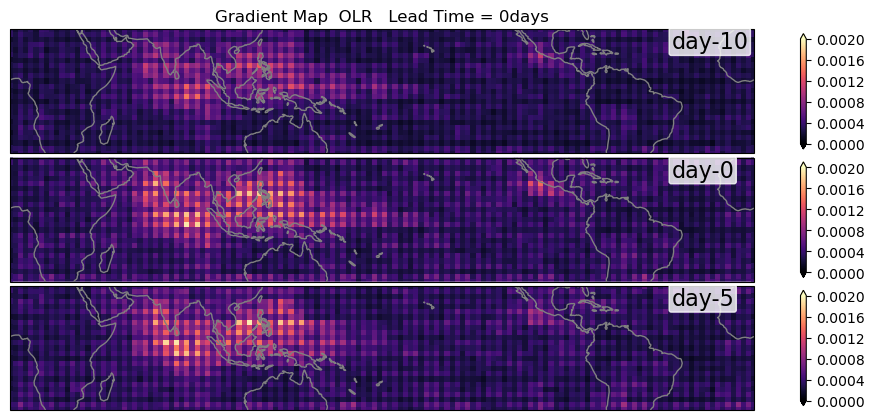

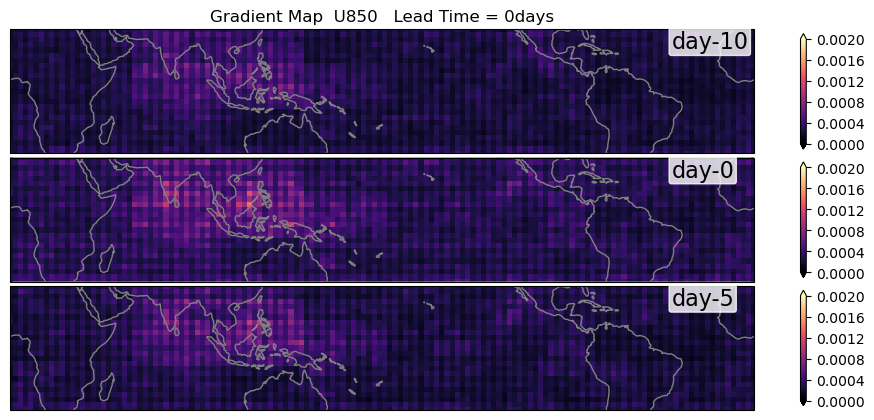

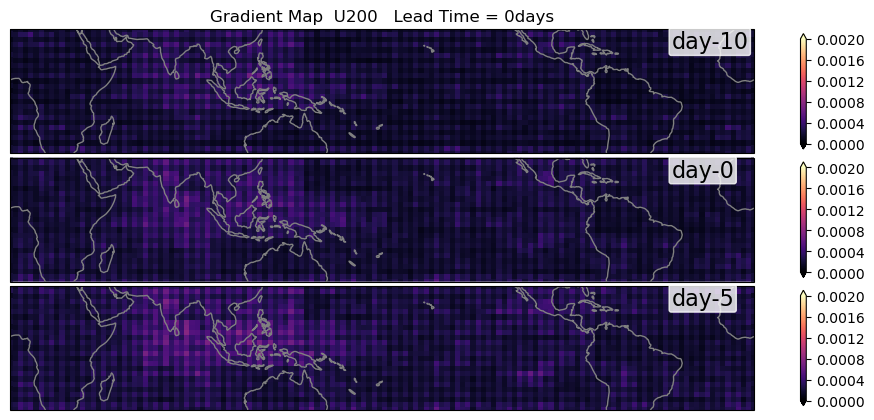

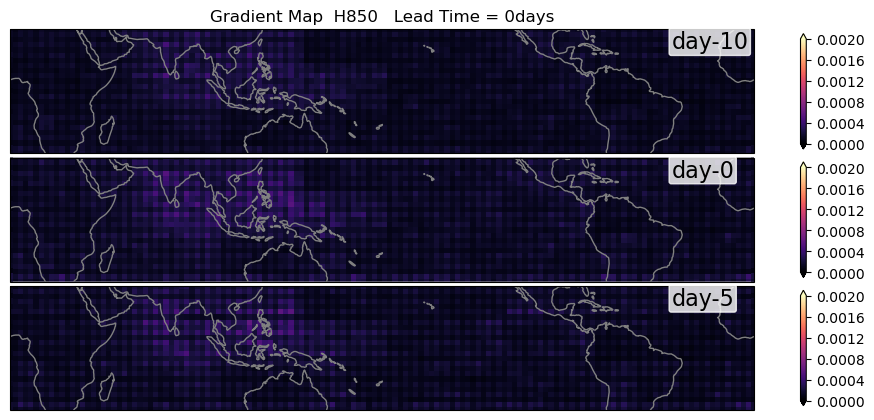

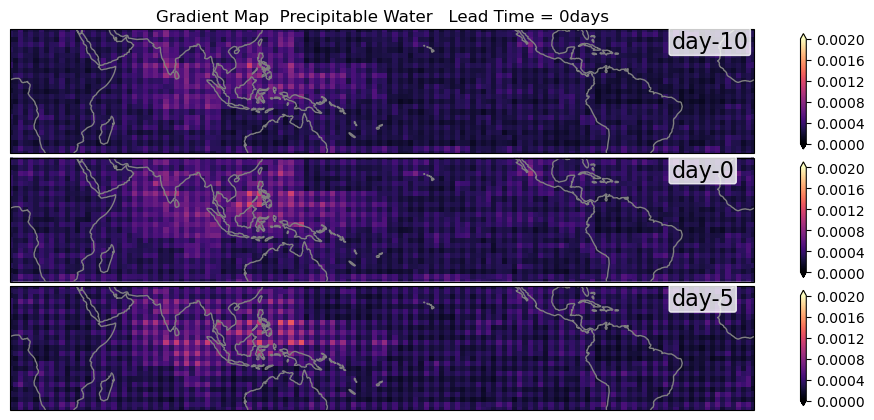

In [77]:
name_box = ['OLR', 'U850', 'U200', 'H850', 'Precipitable Water']
lag_box = ['day-0', 'day-5', 'day-10']
for jj in range(5):
    fig = plt.figure(figsize=(12,5))
    for cc in range(3):
        ax=fig.add_subplot(3,1,cc+1, projection=ccrs.PlateCarree(central_longitude=180))
        # 上下の余白を調整
        plt.subplots_adjust(hspace=0)
        ax.set_extent([-180, 180, -30, 30], crs=ccrs.PlateCarree())
        #gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.top_labels = False     # 上部の経度のラベルを消去
        if cc != 2:
            gl.bottom_labels = False
        gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30)) # 経度線
        gl.ylocator = mticker.FixedLocator(np.arange(-30, 30, 10)) # 緯度線
        ax.coastlines(color='gray')

        lon = np.linspace(0, 360, 144)
        lat = np.linspace(30, -30, 25)
        x, y = np.meshgrid(lon-180.0, lat) # 経度、緯度データ
        cntr = ax.pcolormesh(x, y, grad_std7[:,:,3*jj+cc], vmax=0.002, vmin=0, cmap='magma')
        cbar = fig.colorbar(cntr,ticks = np.linspace(0, 0.002, 6), extend='both', orientation='vertical', shrink=0.9)
        ax.text(140, 24, lag_box[cc-1], fontsize=16, ha='left', va='center', bbox=dict(facecolor='w', edgecolor='w', boxstyle='round,pad=0.1', alpha=0.8))
        if cc == 0:
            ax.set_title('Gradient Map  ' + str(name_box[jj]) + '   Lead Time = ' + str(lead_time) + 'days')
        ax.axis((-180, 180, -30, 30))

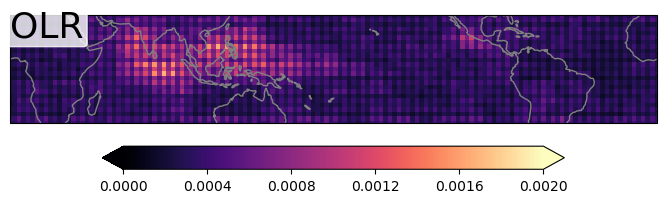

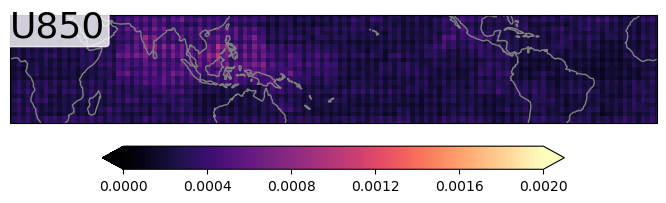

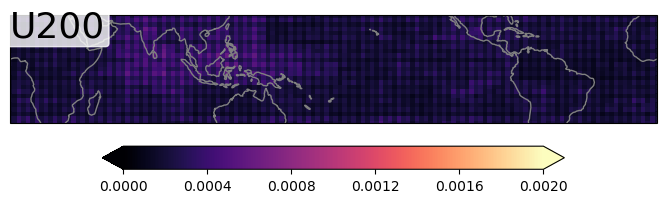

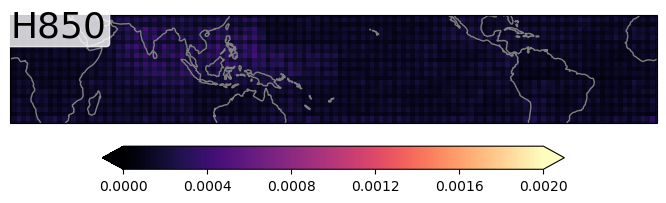

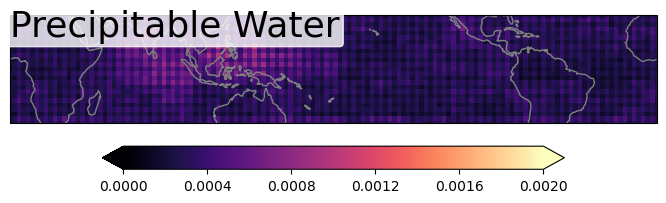

In [94]:
name_box = ['OLR', 'U850', 'U200', 'H850', 'Precipitable Water']
lag_box = ['day-0', 'day-5', 'day-10']
for jj in range(0,5):
    fig = plt.figure(figsize=(15,2))
    ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree(central_longitude=180))
    # 上下の余白を調整
    plt.subplots_adjust(hspace=0)
    ax.set_extent([-180, 180, -30, 30], crs=ccrs.PlateCarree())
    #gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.top_labels = False     # 上部の経度のラベルを消去
    gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30)) # 経度線
    gl.ylocator = mticker.FixedLocator(np.arange(-30, 30, 10)) # 緯度線
    ax.coastlines(color='gray')

    lon = np.linspace(0, 360, 144)
    lat = np.linspace(30, -30, 25)
    x, y = np.meshgrid(lon-180.0, lat) # 経度、緯度データ
    cntr = ax.pcolormesh(x, y, grad_std7[:,:,3*jj:3*jj+3].mean(axis=2), vmax=0.002, vmin=0, cmap='magma')
    cbar = fig.colorbar(cntr,ticks = np.linspace(0, 0.002, 6), extend='both', orientation='horizontal', shrink=0.9, )
    ax.text(-180, 24, name_box[jj], fontsize=26, ha='left', va='center', bbox=dict(facecolor='w', edgecolor='w', boxstyle='round,pad=0.1', alpha=0.8))
    ax.axis((-180, 180, -30, 30))
plt.show()

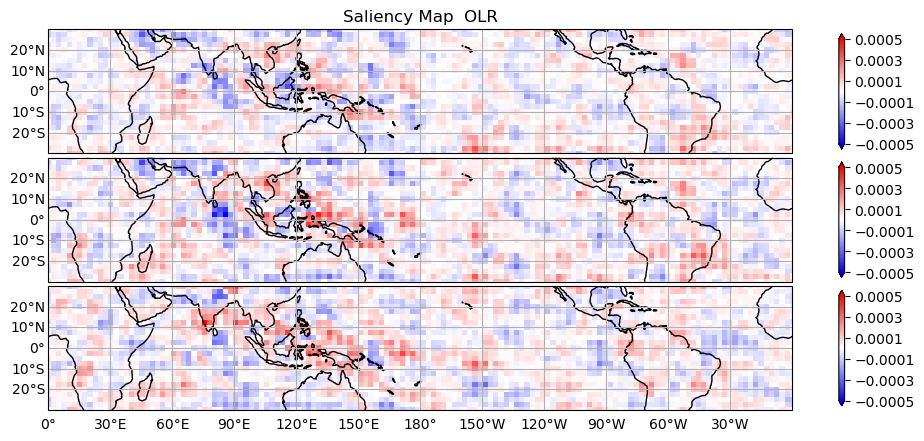

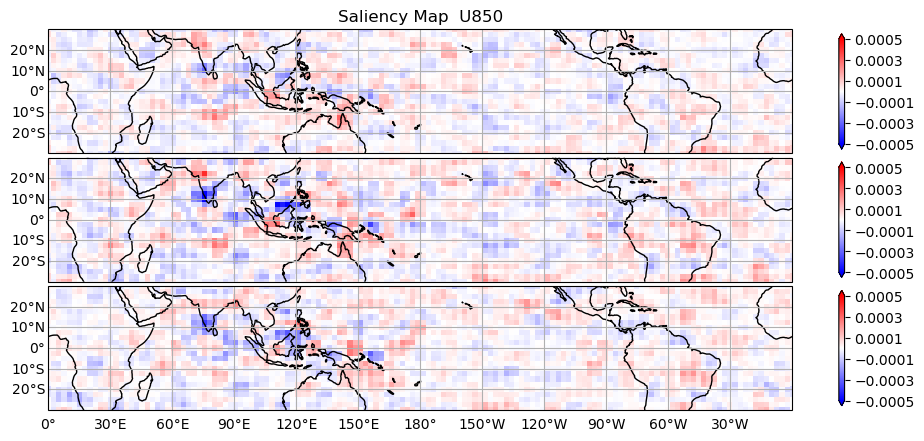

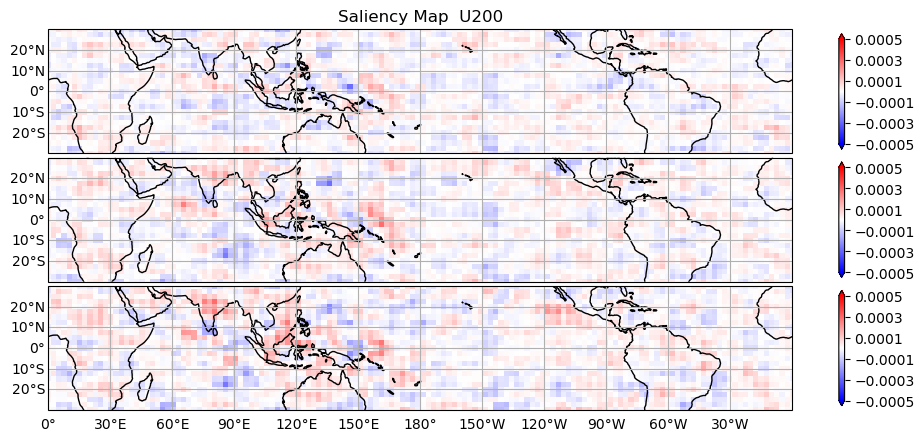

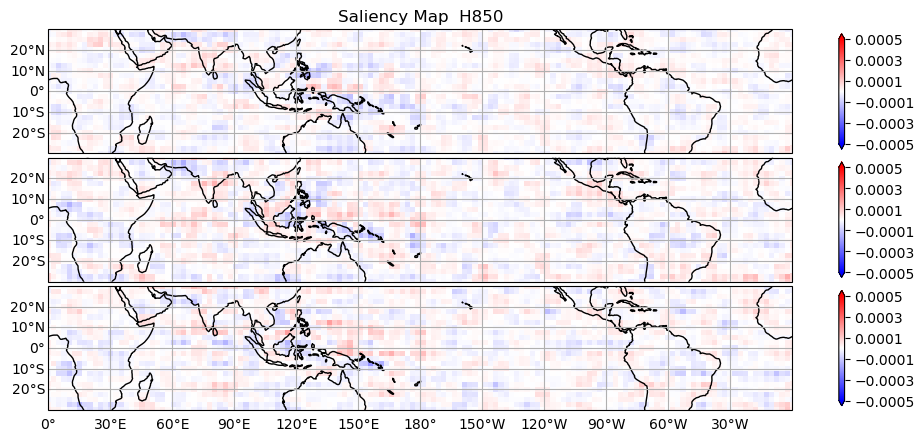

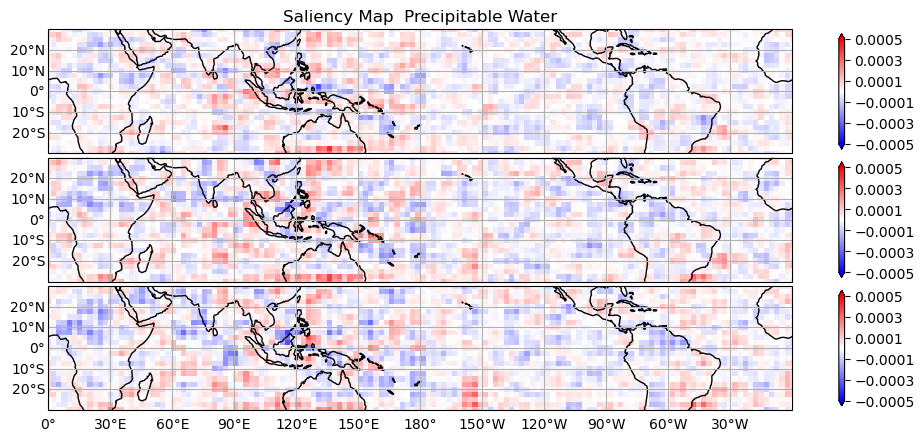

In [42]:
name_box = ['OLR', 'U850', 'U200', 'H850', 'Precipitable Water']
lag_box = ['day-0', 'day-5', 'day-10']
for jj in range(5):
    fig = plt.figure(figsize=(12,5))
    for cc in range(3):
        ax=fig.add_subplot(3,1,cc+1, projection=ccrs.PlateCarree(central_longitude=180))
        # 上下の余白を調整
        plt.subplots_adjust(hspace=0)
        ax.set_extent([-180, 180, -30, 30], crs=ccrs.PlateCarree())
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.top_labels = False     # 上部の経度のラベルを消去
        if cc != 2:
            gl.bottom_labels = False
        gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30)) # 経度線
        gl.ylocator = mticker.FixedLocator(np.arange(-30, 30, 10)) # 緯度線
        ax.coastlines()

        lon = np.linspace(0, 360, 144)
        lat = np.linspace(30, -30, 25)
        x, y = np.meshgrid(lon-180.0, lat) # 経度、緯度データ
        cntr = ax.pcolormesh(x, y, grad_mean[:,:,3*jj+cc], vmax=0.0005, vmin=-0.0005, cmap='bwr')
        cbar = fig.colorbar(cntr,ticks = np.linspace(-0.0005, 0.0005, 6), extend='both', orientation='vertical', shrink=0.9)
        if cc == 0:
            ax.set_title('Saliency Map  ' + str(name_box[jj]))
        ax.axis((-180, 180, -30, 30))